In [1]:
try:
    import google.colab
    google.colab.drive.mount('/content/drive/')
    %cd ../content/drive/Othercomputers/Laptop/Flood_Detection
    !pip install -q pytorch-lightning
    !pip install -q torchview
    !pip install -q umap-learn
except:
    pass

In [2]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from FeatureExtraction.Resnet.Resnet import apply_deep_features
from FeatureExtraction.Visuals import illustrate3DFeatures
import albumentations as A
import albumentations.pytorch as AP

### Data Preparation

In [3]:
more_transforms = [AP.transforms.ToTensorV2()]          # PyTorch deals with tensors on the GPU not numpy arrays
x_train_d, x_val_d, y_train_d, y_val_d = read_data(gray=False, normalize=True, new_size=224, more_transforms=more_transforms, saved=True)

x_train shape:  (737,)
x_val shape:  (185,)


### Feature Extraction

In [4]:
x_train_f, x_val_f = apply_deep_features(x_train_d, x_val_d, saved=True)

### Visualization

In [5]:
print(x_train_f.shape)

(737, 2048)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


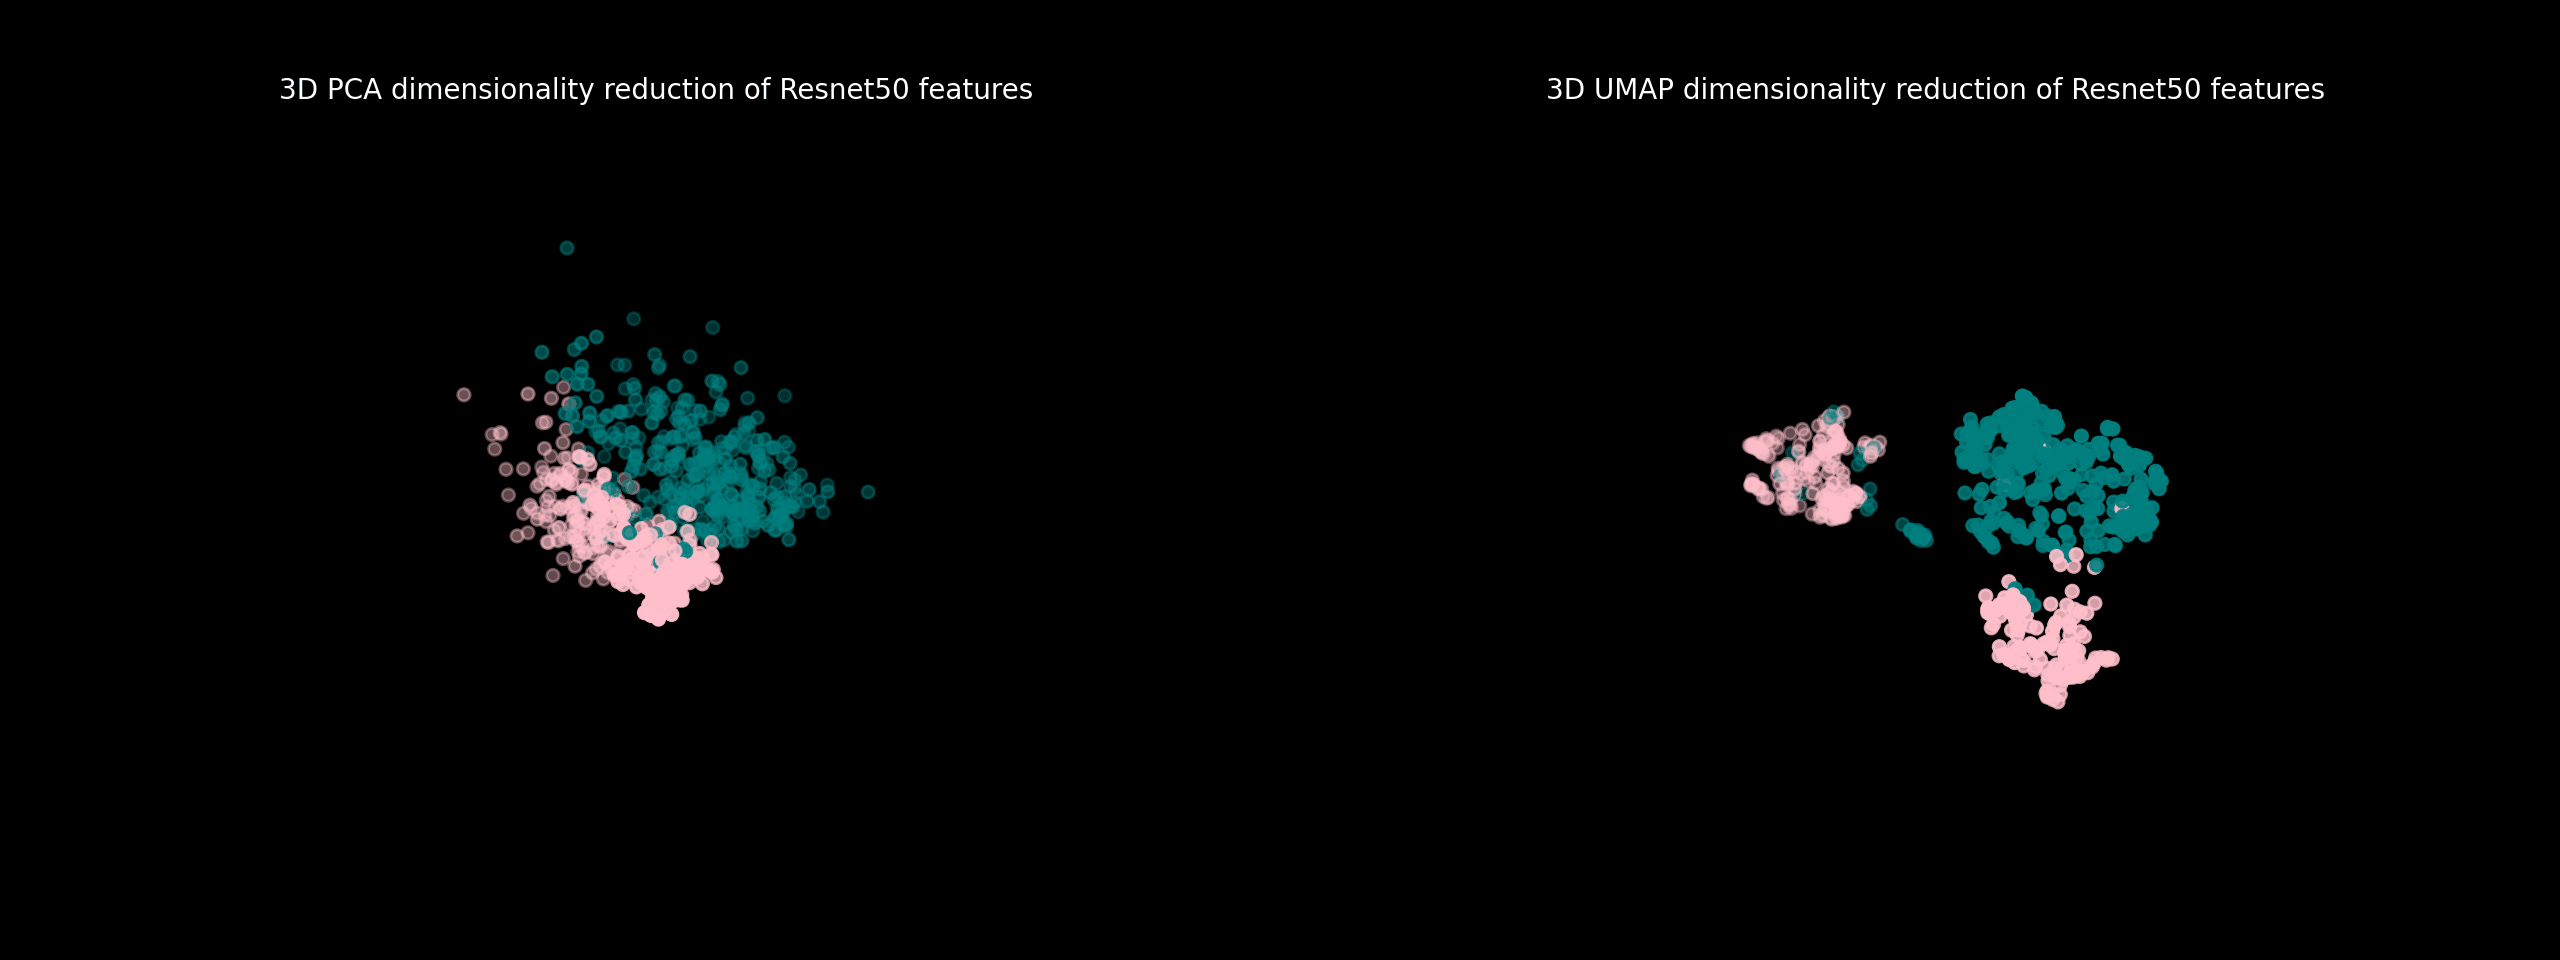

In [6]:
illustration = illustrate3DFeatures(x_train_f, y_train_d, "Resnet50")
illustration.double_gif(animated=True)